> EbayesThresh

In [47]:
from itstgcn.learners import * 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [49]:
from rpy2.robjects.vectors import FloatVector
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
ebayesthresh = importr('EbayesThresh').ebayesthresh

In [50]:
T = 100

In [51]:
t = np.arange(T)/T * 10

In [52]:
y_true = 3*np.sin(0.5*t) + 1.2*np.sin(1.0*t) + 0.5*np.sin(1.2*t) 

In [53]:
y = y_true + np.random.normal(size=T)

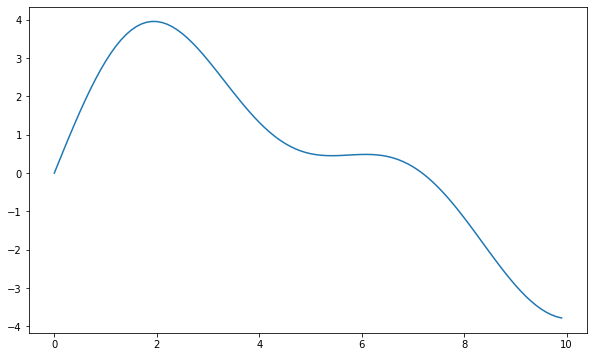

In [54]:
plt.figure(figsize=(10,6))
plt.plot(t,y_true)

`-` 관찰한 신호 

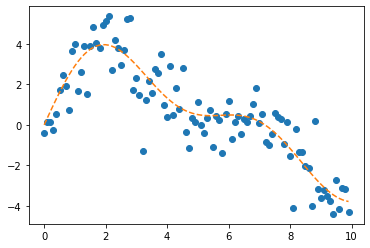

In [55]:
plt.plot(t,y,'o')
plt.plot(t,y_true,'--')

`-` 퓨리에 변환 

In [56]:
f = np.array(y)
if len(f.shape)==1: f = f.reshape(-1,1)
T,N = f.shape
Psi = make_Psi(T)
fbar = Psi.T @ f # apply dft 

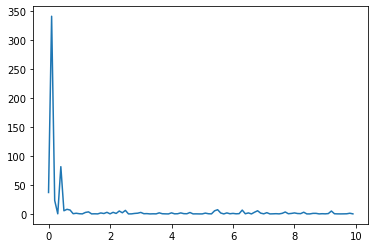

In [57]:
plt.plot(t,fbar**2) # periodogram 

`-` threshed 

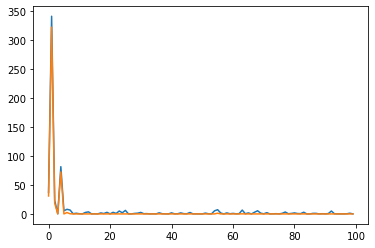

In [58]:
fbar_threshed = np.stack([ebayesthresh(FloatVector(fbar[:,i])) for i in range(N)],axis=1)
plt.plot((fbar**2)) # periodogram 
plt.plot((fbar_threshed**2)) 

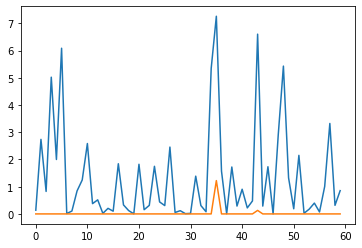

In [59]:
plt.plot((fbar**2)[20:80]) # periodogram 
plt.plot((fbar_threshed**2)[20:80]) 

`-` 역퓨리에변환 

In [60]:
yhat = Psi @ fbar_threshed # inverse dft

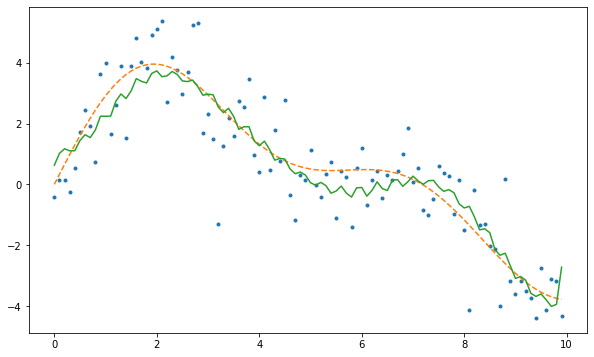

In [61]:
plt.figure(figsize=(10,6))
plt.plot(t,y,'.')
plt.plot(t,y_true,'--')
plt.plot(t,yhat)

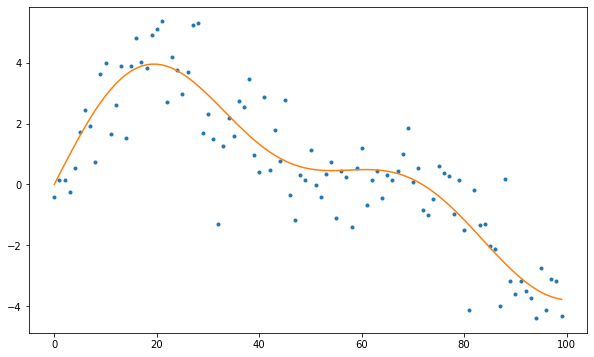

In [62]:
plt.figure(figsize=(10,6))
plt.plot(y,'.')
plt.plot(y_true)

# Result

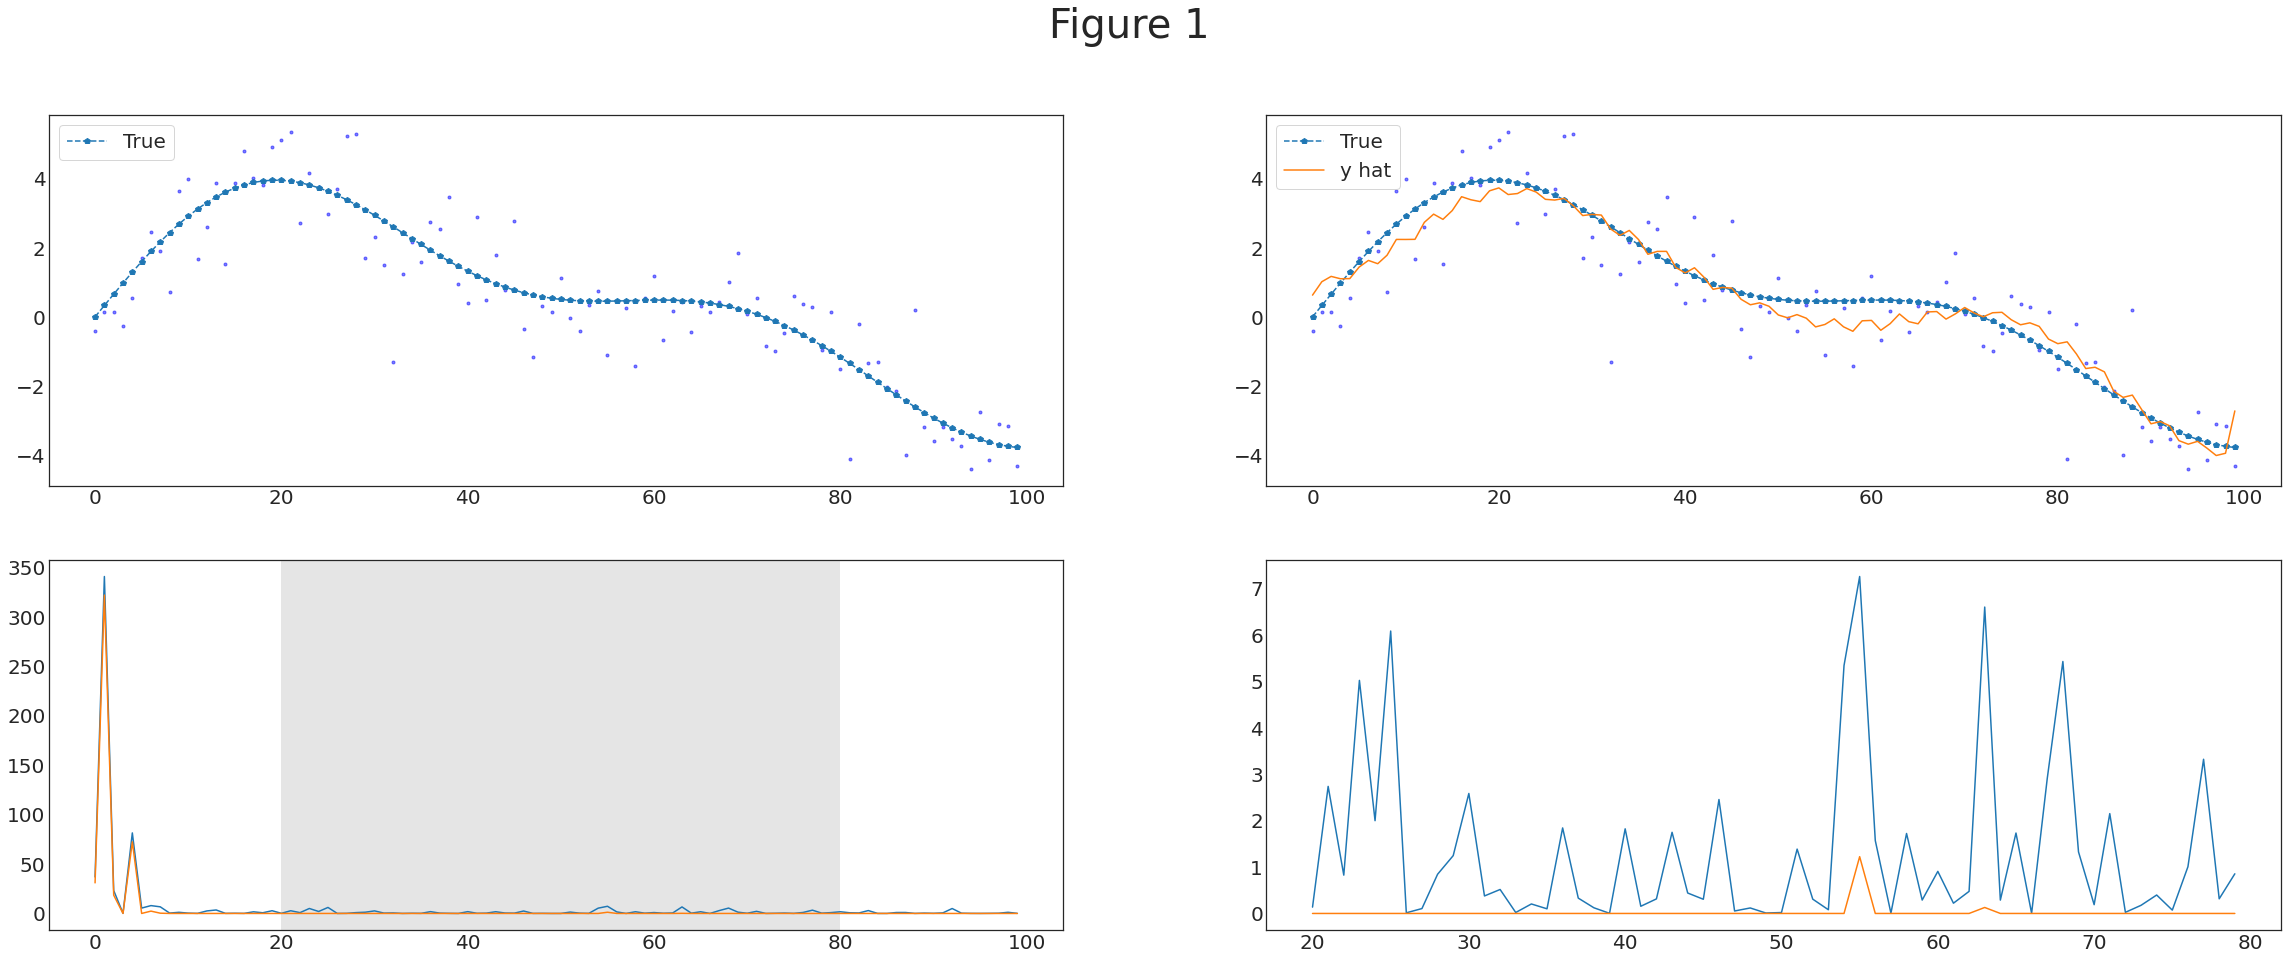

In [63]:
with plt.style.context('seaborn-white'):
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(40,15))
    fig.suptitle('Figure 1',fontsize=40)
    
    ax1.plot(y, 'b.',alpha=0.5)
    ax1.plot(y_true,'p--',label='True')
    ax1.legend(fontsize=20,loc='upper left',facecolor='white', frameon=True)
    
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(y, 'b.',alpha=0.5)
    ax2.plot(y_true,'p--',label='True')
    ax2.plot(yhat,label='y hat')
    ax2.legend(fontsize=20,loc='upper left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot((fbar**2)) # periodogram 
    ax3.plot((fbar_threshed**2)) 
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    ax3.axvspan(20, 80, facecolor='gray', alpha=0.2)

    
    ax4.plot(range(20, 80),(fbar**2)[20:80]) # periodogram 
    ax4.plot(range(20, 80),(fbar_threshed**2)[20:80]) 
    ax4.set_xticks(range(20, 81, 10))
    ax4.set_xticklabels(range(20, 81, 10))
    # ax4.set_xticklabels(['20','40','60'])
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

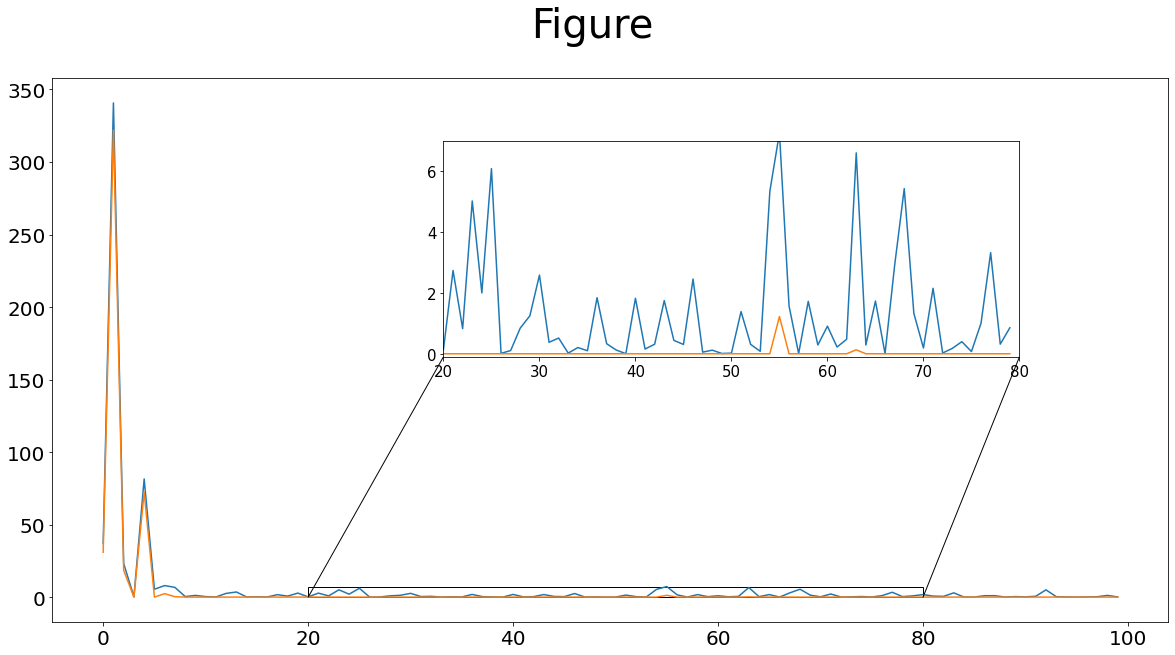

In [64]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
plt.figure(figsize = (20,10))
plt.suptitle('Figure',fontsize=40)
ax = plt.subplot(1, 1, 1)
ax.plot(range(0,100),(fbar**2))
ax.plot((fbar_threshed**2)) 
axins = inset_axes(ax, 8, 3, loc = 1, bbox_to_anchor=(0.8, 0.8),
                   bbox_transform = ax.figure.transFigure)
axins.plot(range(20, 80),(fbar**2)[20:80])
axins.plot(range(20, 80),(fbar_threshed**2)[20:80]) 
axins.set_xlim(20, 80)
axins.set_ylim(-0.1, 7)
mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec = "0.01")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
axins.tick_params(axis='y', labelsize=15)
axins.tick_params(axis='x', labelsize=15)
# plt.savefig('Ebayes_Toy.png')

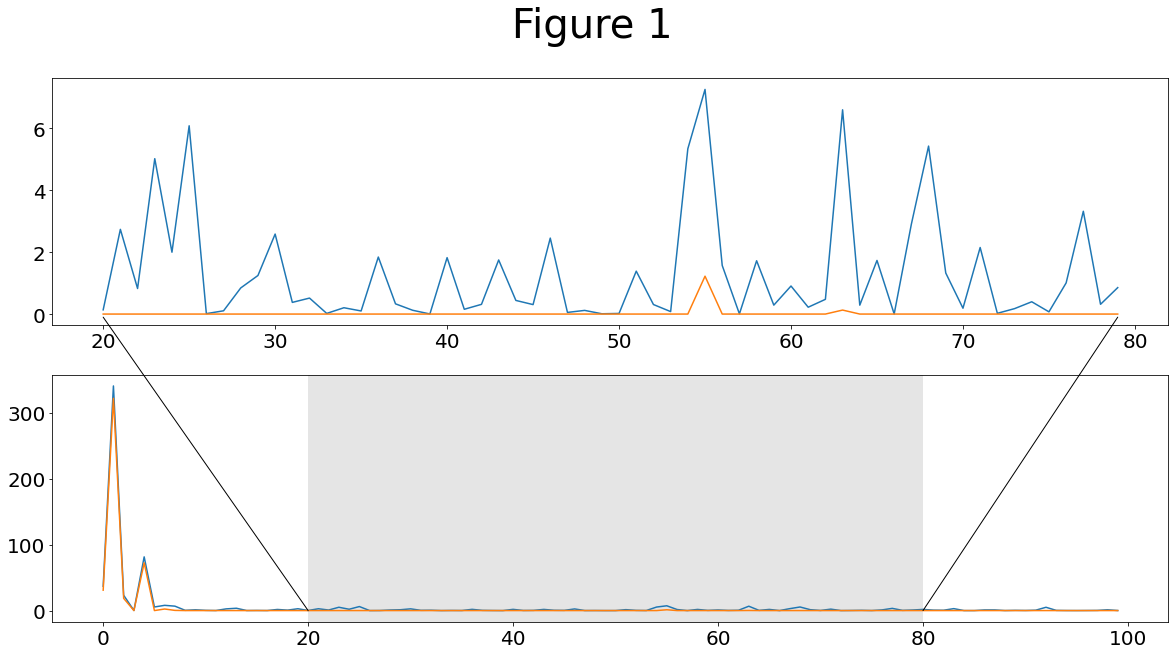

In [65]:
from matplotlib.patches import ConnectionPatch
fig = plt.figure(figsize=(20,10))
plt.suptitle('Figure 1',fontsize=40)
plot1 = fig.add_subplot(2,2,(1,2))

plot1.plot(range(20, 80),(fbar**2)[20:80]) # periodogram 
plot1.plot(range(20, 80),(fbar_threshed**2)[20:80]) 
plot1.set_xticks(range(20, 81, 10))
plot1.set_xticklabels(range(20, 81, 10))
plot1.tick_params(axis='y', labelsize=20)
plot1.tick_params(axis='x', labelsize=20)

plot3 = fig.add_subplot(2,2,(3,4)) 

plot3.plot((fbar**2)) # periodogram 
plot3.plot((fbar_threshed**2)) 
plot3.tick_params(axis='y', labelsize=20)
plot3.tick_params(axis='x', labelsize=20)
plot3.axvspan(20, 80, facecolor='gray', alpha=0.2)

# plot3.fill_between((20, 80), 10, 60, facecolor= "red", alpha = 0.2)
conn1 = ConnectionPatch(xyA = (20, -0.1), coordsA=plot1.transData,
                       xyB=(20, 0), coordsB=plot3.transData, color = 'black')
fig.add_artist(conn1)
conn2 = ConnectionPatch(xyA = (79, -0.1), coordsA=plot1.transData,
                       xyB=(80, 0), coordsB=plot3.transData, color = 'black')
fig.add_artist(conn2)
plt.show()

# In article

In [10]:
import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

In [11]:
%load_ext rpy2.ipython

In [12]:
%%R
library(GNAR)
library(igraph)

R[write to console]: Loading required package: igraph

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union


R[write to console]: Loading required package: wordcloud

R[write to console]: Loading required package: RColorBrewer



In [8]:
import rpy2

In [3]:
from rpy2.robjects.packages import importr

In [5]:
ebayesthresh = importr('EbayesThresh').ebayesthresh

In [ ]:
#import rpy2
#import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
GNAR = importr('GNAR') # import GNAR 
#igraph = importr('igraph') # import igraph 
ebayesthresh = importr('EbayesThresh').ebayesthresh

In [13]:
%%R
set.seed(1)
x <- rnorm(1000) + sample(c( runif(25,-7,7), rep(0,975)))

$X_i$에서 $\mu_i$ 추출 가능하는 것을 증명할 예제

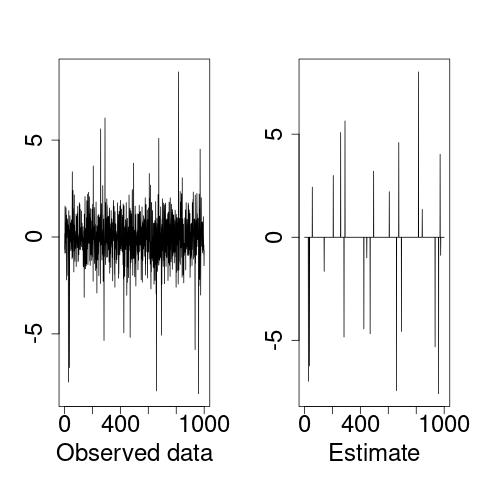

In [43]:
%%R
# png("Ebayes_plot1.png", width=1600, height=800)
par(mfrow=c(1,2))
par(cex.axis=2) 
par(cex.lab=2)
plot(x, type='l', xlab="Observed data", ylab="")
plot(ebayesthresh(x, sdev=1),type='l', xlab="Estimate", ylab="")
# dev.off()

In [89]:
import itstgcn

In [70]:
itstgcn.make_Psi(T)

array([[ 0.07106691, -0.10050378,  0.10050378, ..., -0.10050378,
        -0.10050378,  0.07106691],
       [ 0.10050378, -0.14206225,  0.14184765, ...,  0.14184765,
         0.14206225, -0.10050378],
       [ 0.10050378, -0.14184765,  0.14099032, ..., -0.14099032,
        -0.14184765,  0.10050378],
       ...,
       [ 0.10050378,  0.14184765,  0.14099032, ...,  0.14099032,
        -0.14184765, -0.10050378],
       [ 0.10050378,  0.14206225,  0.14184765, ..., -0.14184765,
         0.14206225,  0.10050378],
       [ 0.07106691,  0.10050378,  0.10050378, ...,  0.10050378,
        -0.10050378, -0.07106691]])

```python
def trim(f):
    f = np.array(f)
    if len(f.shape)==1: f = f.reshape(-1,1)
    T,N = f.shape
    Psi = make_Psi(T)
    fbar = Psi.T @ f # apply dft 
    fbar_threshed = np.stack([ebayesthresh(FloatVector(fbar[:,i])) for i in range(N)],axis=1)
    fhat = Psi @ fbar_threshed # inverse dft 
    return fhat
```

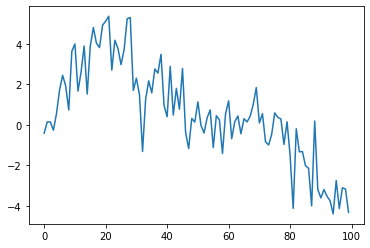

In [84]:
plt.plot(y)

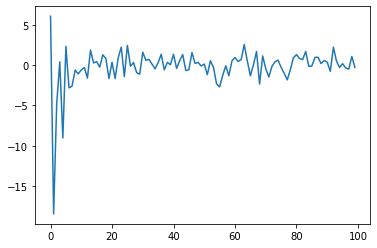

In [80]:
plt.plot(itstgcn.make_Psi(T).T@y)

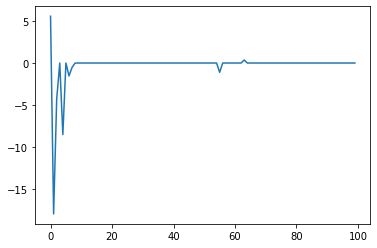

In [178]:
plt.plot(ebayesthresh(FloatVector(itstgcn.make_Psi(T).T@y)))

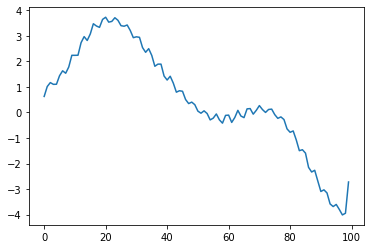

In [179]:
plt.plot(itstgcn.make_Psi(T)@ebayesthresh(FloatVector(itstgcn.make_Psi(T).T@y)))

In [256]:
_T = 1000

In [257]:
_t = np.arange(_T)/_T * 10

In [280]:
_x = 3*np.sin(2*_t)+2*np.random.rand(_T)+1.5*np.sin(4*_t)+1.5*np.sin(8*_t)

Psi

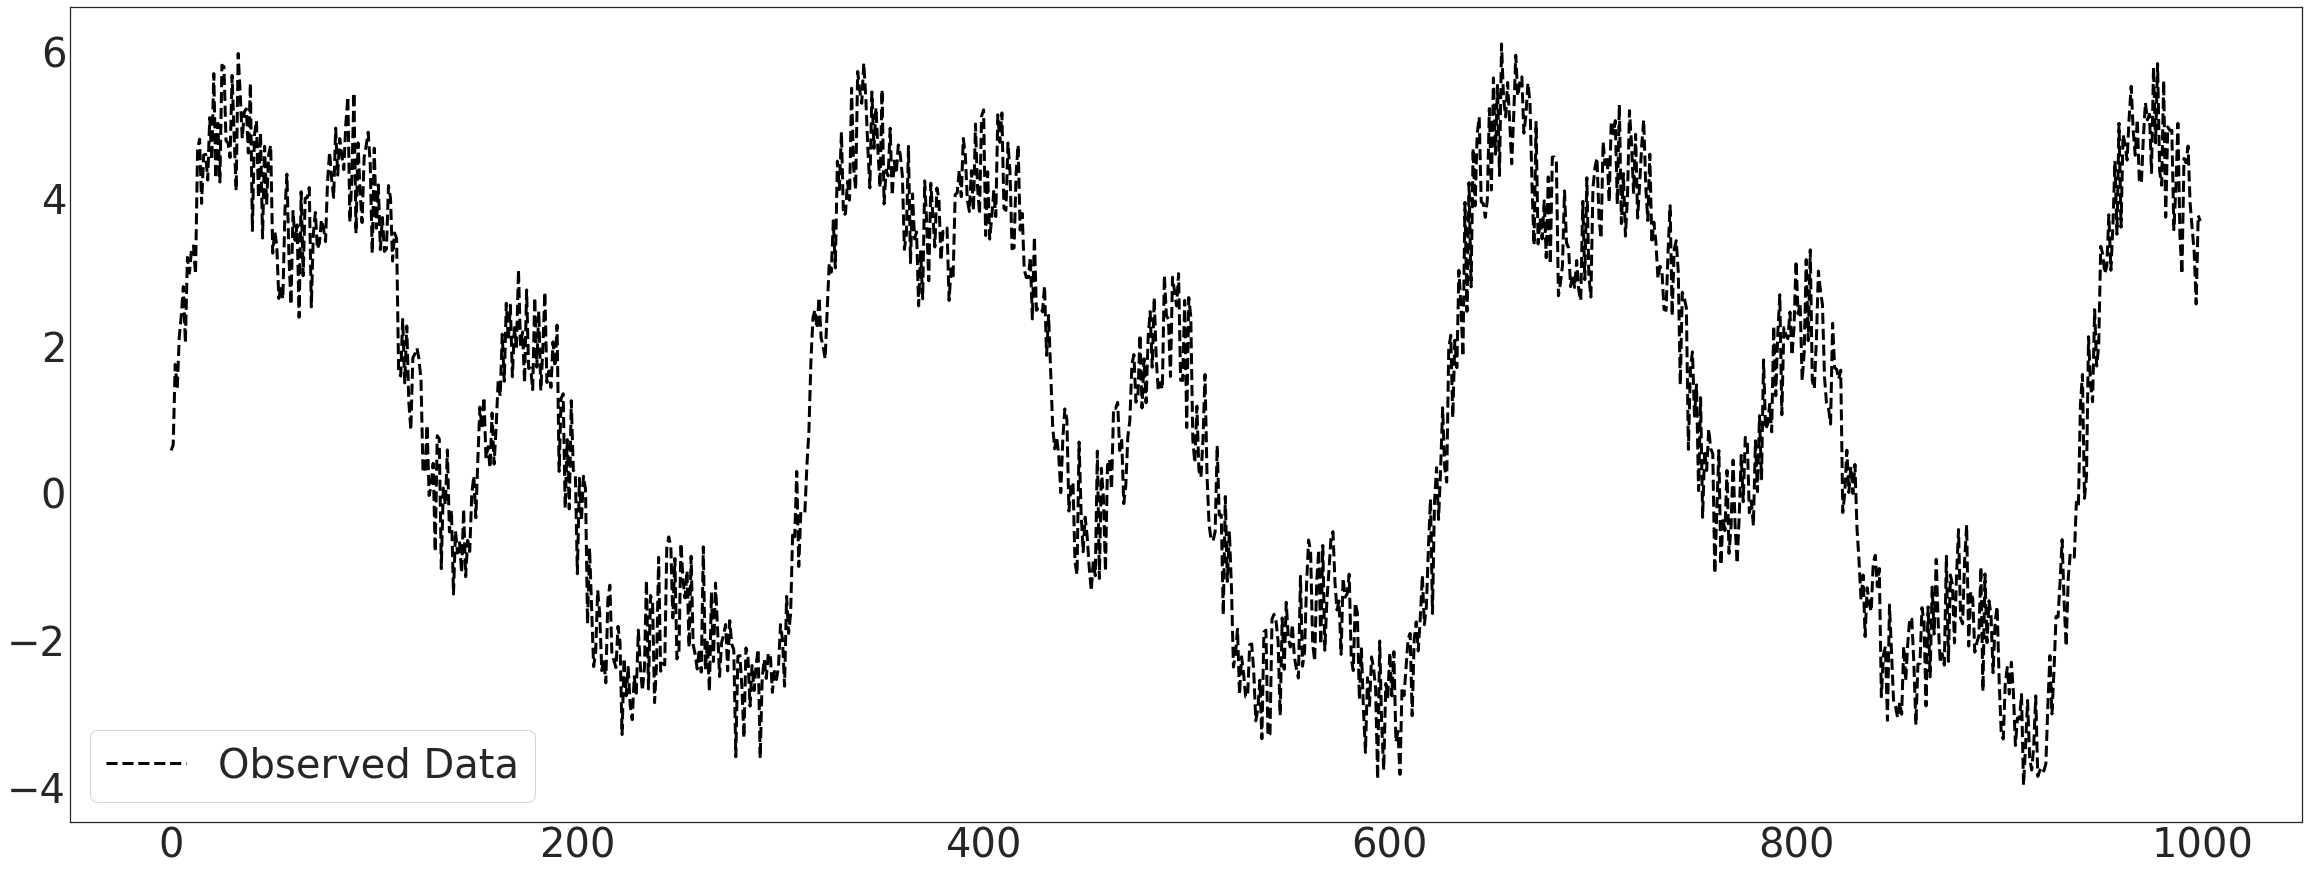

In [281]:
with plt.style.context('seaborn-white'):
    fig, ax1 = plt.subplots(figsize=(40,15))
    ax1.plot(_x,'k--',label='Observed Data',lw=3)
    ax1.legend(fontsize=40,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=40)
    ax1.tick_params(axis='x', labelsize=40)
plt.savefig('Ebayes_fst.png')

fourier transform

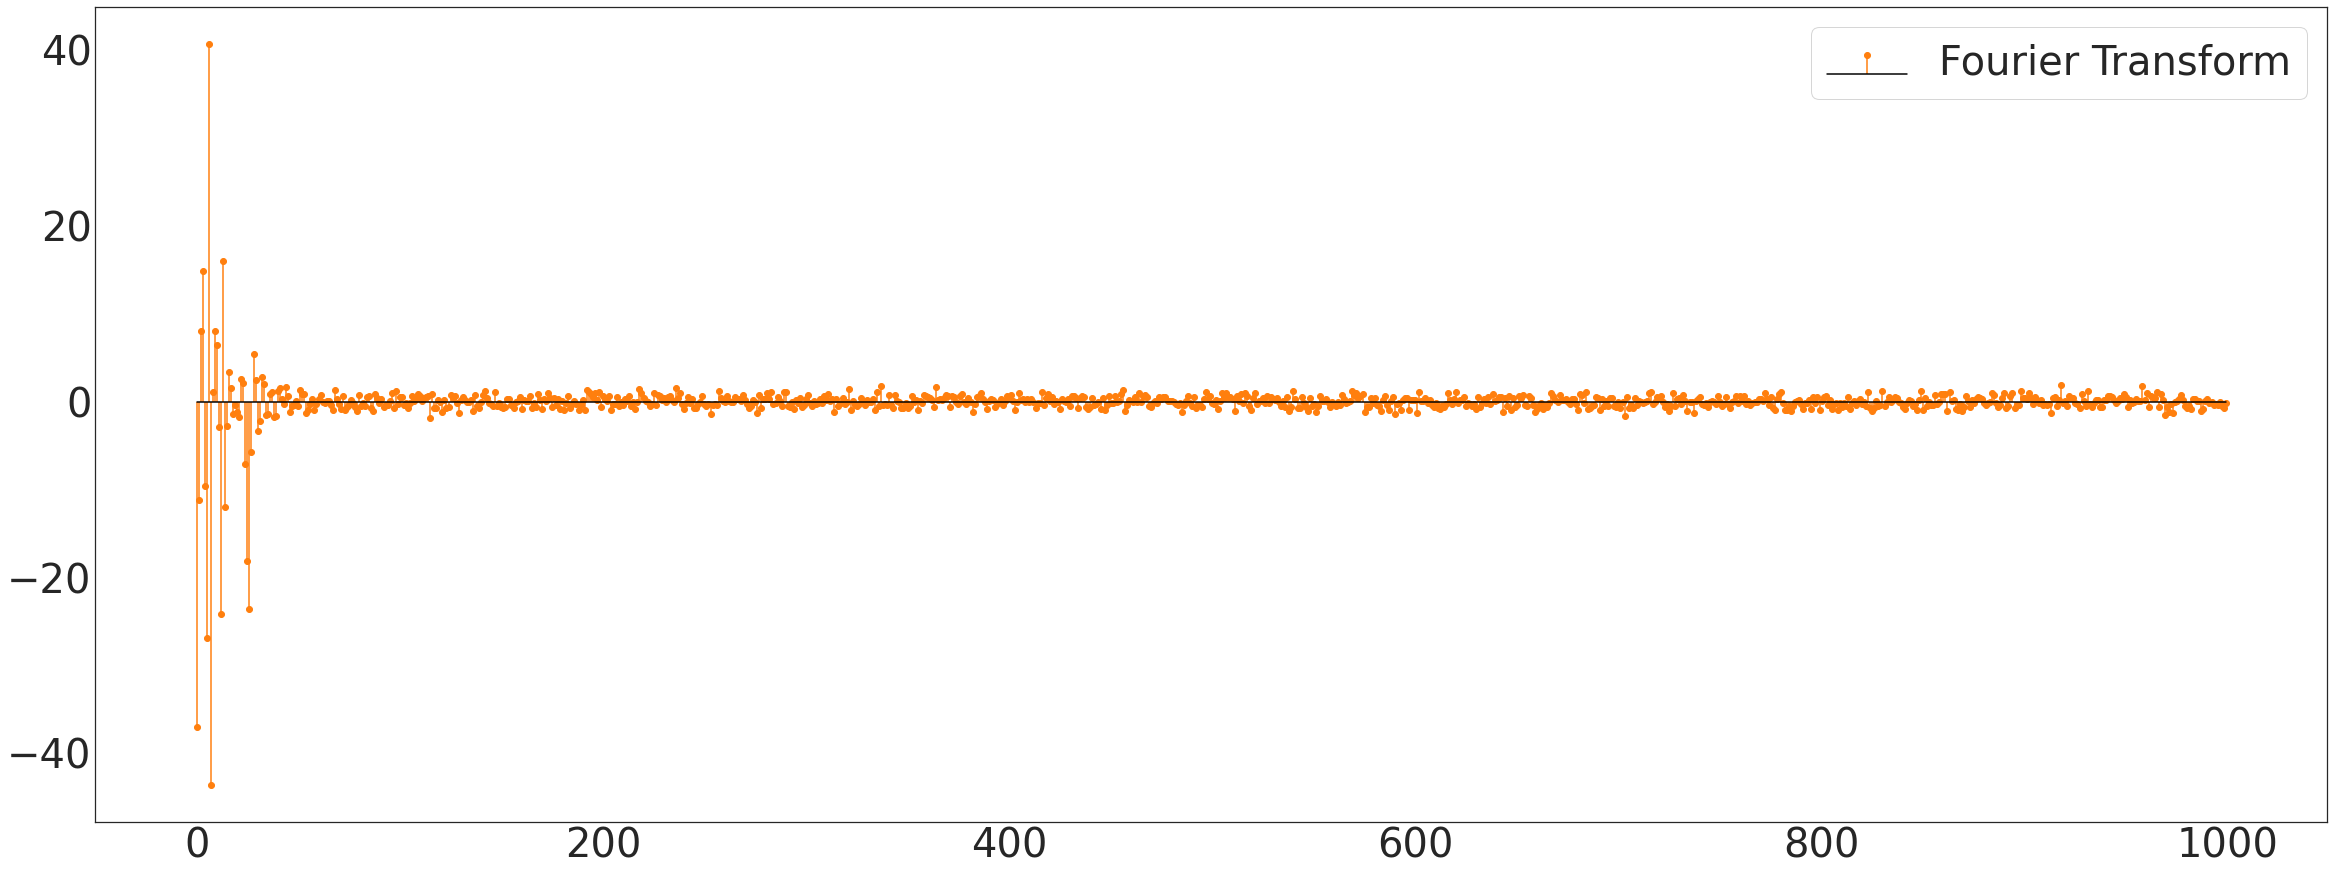

In [303]:
with plt.style.context('seaborn-white'):
    fig, ax1 = plt.subplots(figsize=(40,15))
    # ax1.plot(itstgcn.make_Psi(_T).T@np.array(_x),'-',color='C1',label='Fourier Transform',lw=3)
    ax1.stem(itstgcn.make_Psi(_T).T@np.array(_x),linefmt='C1-',basefmt='k-',label='Fourier Transform')
    ax1.legend(fontsize=40,loc='upper right',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=40)
    ax1.tick_params(axis='x', labelsize=40)
plt.savefig('Ebayes_snd.png')

Ebayesthresh/trim

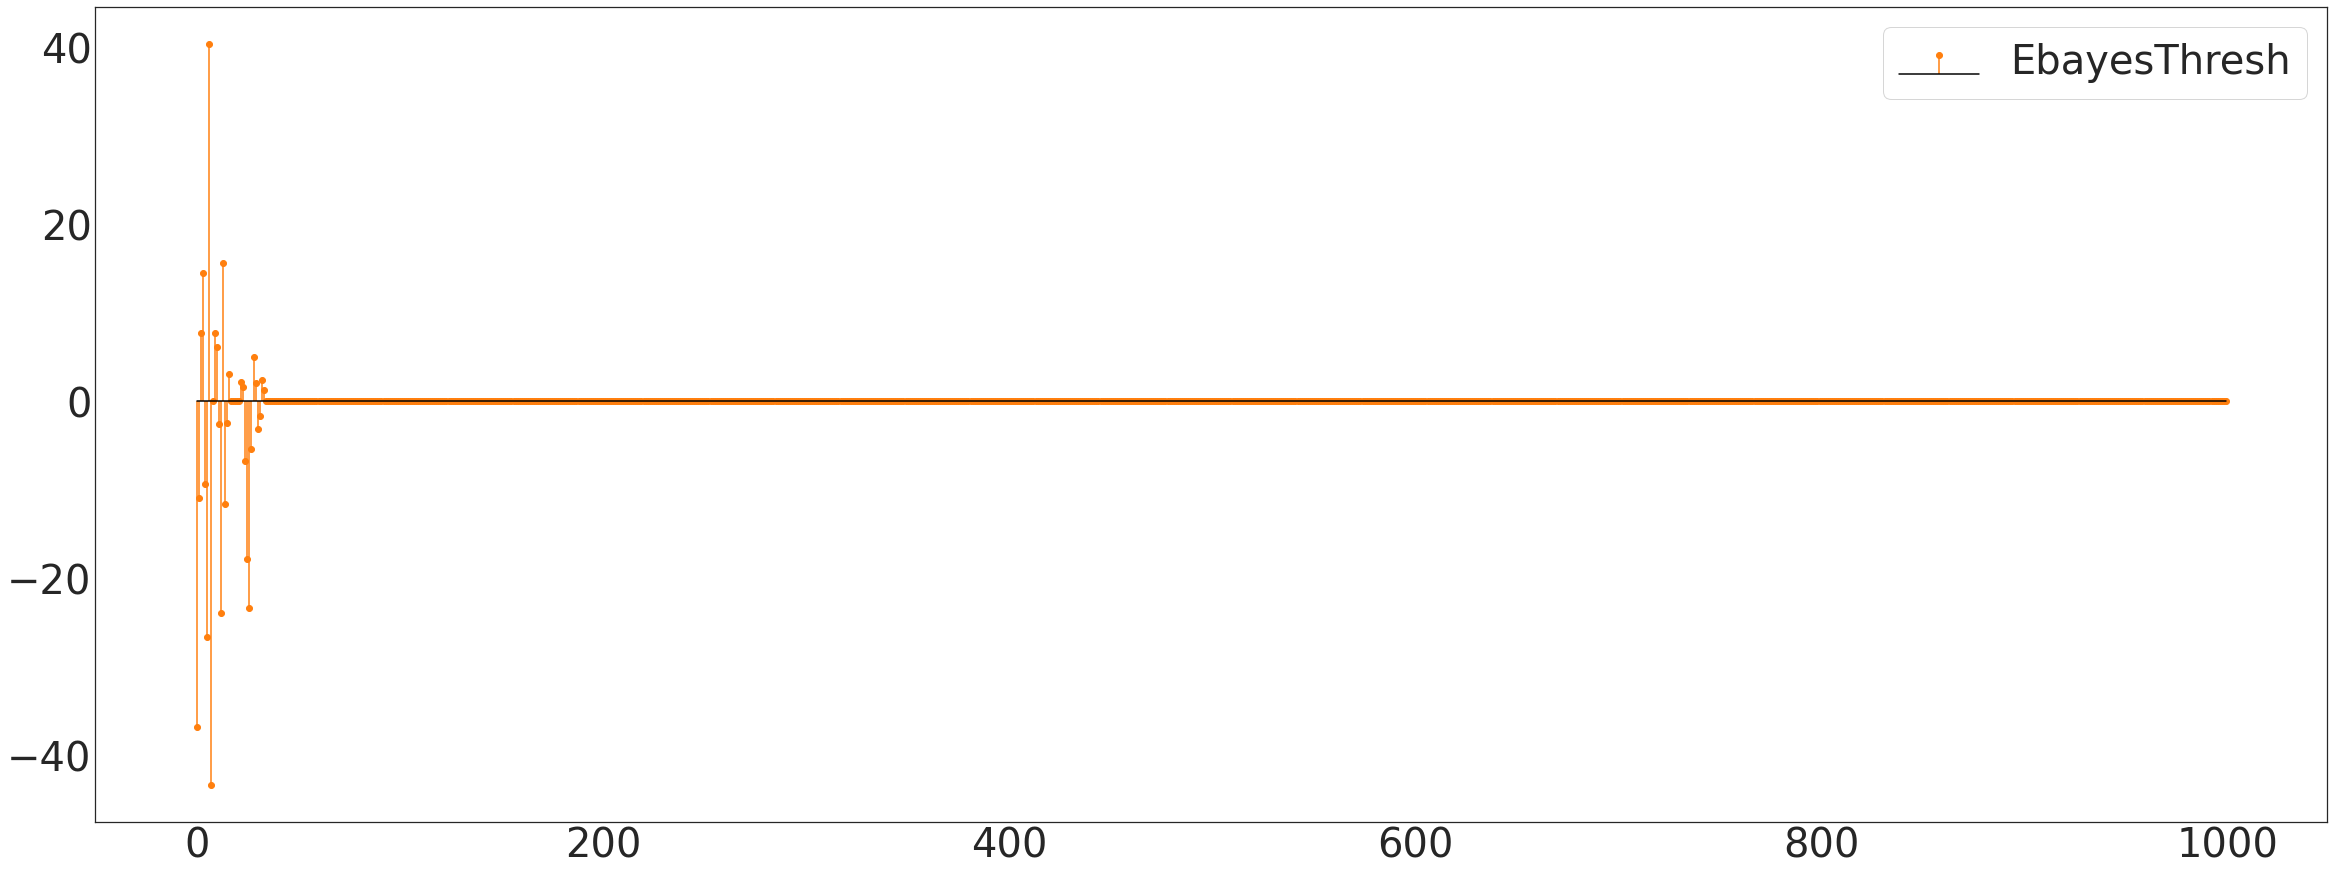

In [305]:
with plt.style.context('seaborn-white'):
    fig, ax1 = plt.subplots(figsize=(40,15))
    # ax1.plot(ebayesthresh(FloatVector(itstgcn.make_Psi(_T).T@np.array(_x))),'-',color='C1',label='EbayesThresh',lw=3)
    ax1.stem(ebayesthresh(FloatVector(itstgcn.make_Psi(_T).T@np.array(_x))),linefmt='C1-',basefmt='k-',label='EbayesThresh')
    ax1.legend(fontsize=40,loc='upper right',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=40)
    ax1.tick_params(axis='x', labelsize=40)
plt.savefig('Ebayes_trd.png')

fhat

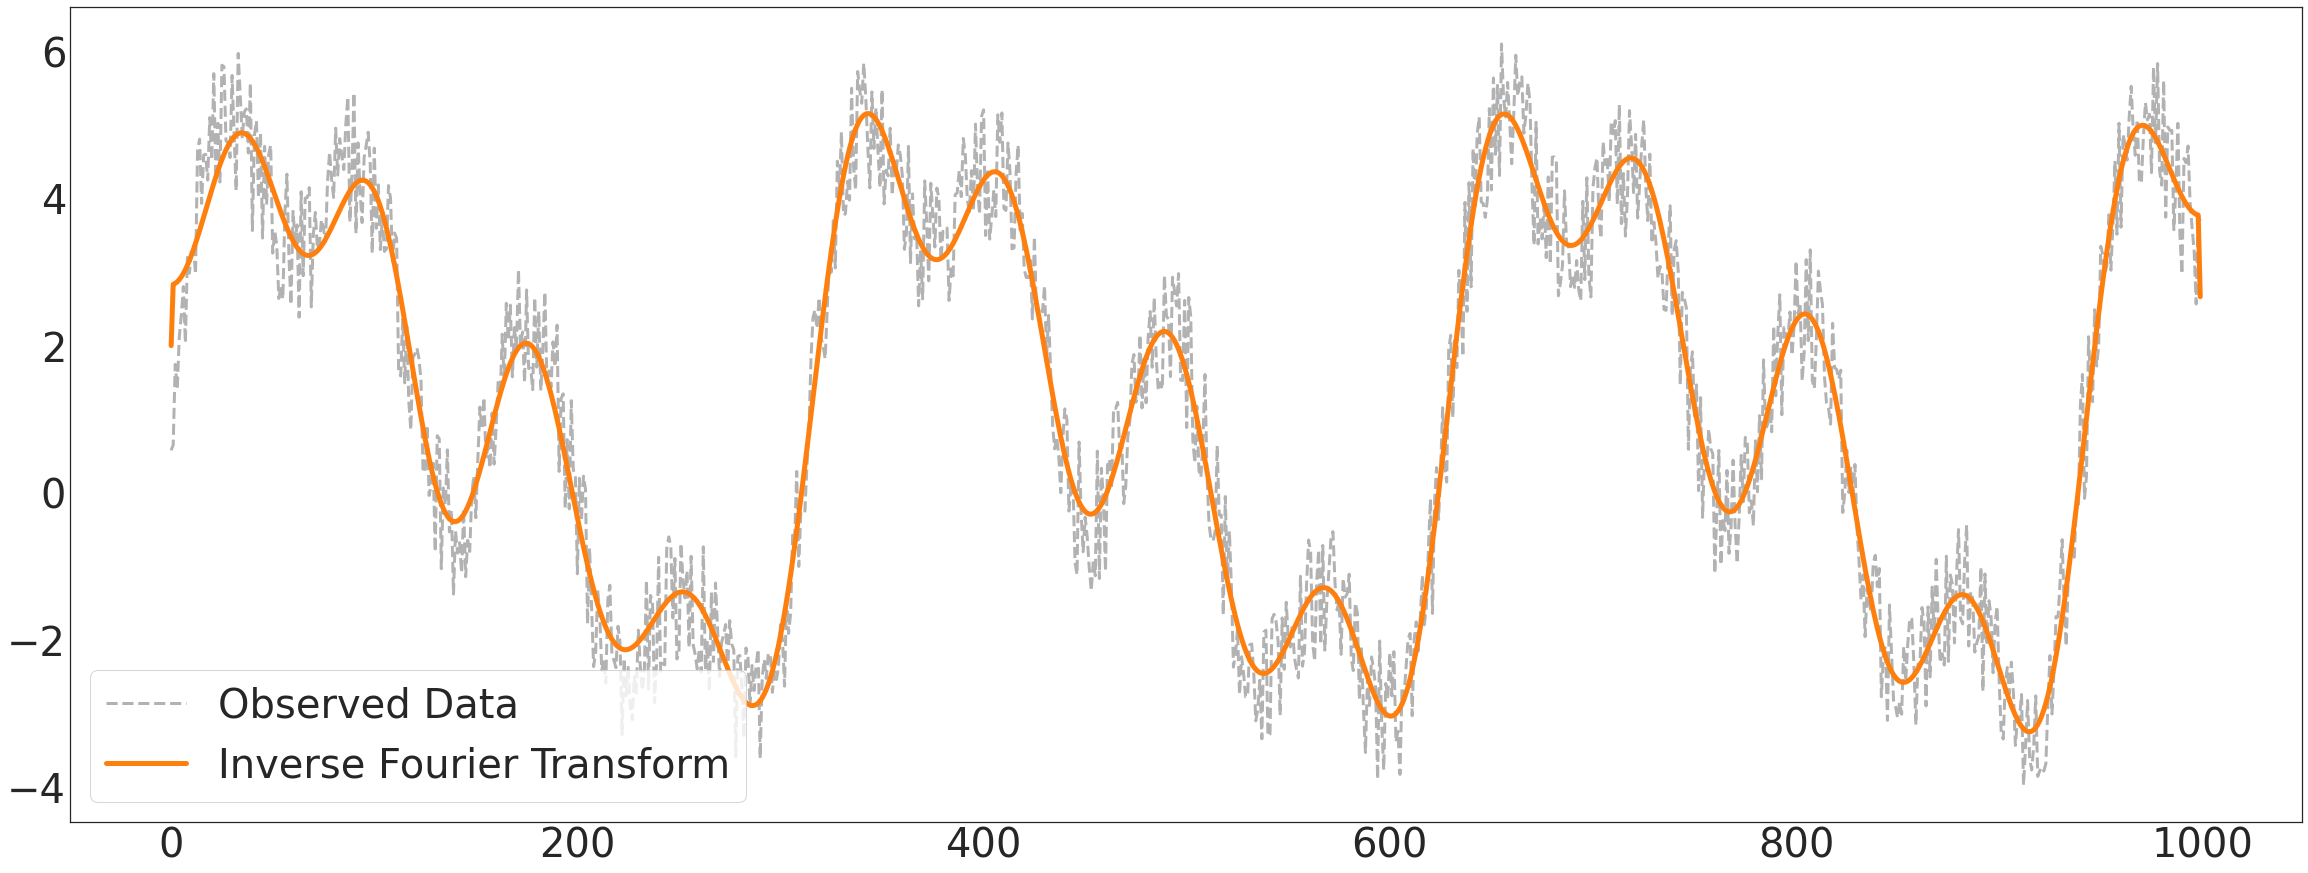

In [284]:
with plt.style.context('seaborn-white'):
    fig, ax1 = plt.subplots(figsize=(40,15))
    ax1.plot(_x,'k--',label='Observed Data',lw=3,alpha=0.3)
    ax1.plot(itstgcn.make_Psi(_T)@ebayesthresh(FloatVector(itstgcn.make_Psi(_T).T@np.array(_x))),'-',color='C1',label='Inverse Fourier Transform',lw=5)
    ax1.legend(fontsize=40,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=40)
    ax1.tick_params(axis='x', labelsize=40)
plt.savefig('Ebayes_fth.png')

In [309]:
plt.stem?

Signature:
plt.stem(
    *args,
    linefmt=None,
    markerfmt=None,
    basefmt=None,
    bottom=0,
    label=None,
    use_line_collection=<deprecated parameter>,
    orientation='vertical',
    data=None,
)
Docstring:
Create a stem plot.

A stem plot draws lines perpendicular to a baseline at each location
*locs* from the baseline to *heads*, and places a marker there. For
vertical stem plots (the default), the *locs* are *x* positions, and
the *heads* are *y* values. For horizontal stem plots, the *locs* are
*y* positions, and the *heads* are *x* values.

Call signature::

  stem([locs,] heads, linefmt=None, markerfmt=None, basefmt=None)

The *locs*-positions are optional. *linefmt* may be provided as
positional, but all other formats must be provided as keyword
arguments.

Parameters
----------
locs : array-like, default: (0, 1, ..., len(heads) - 1)
    For vertical stem plots, the x-positions of the stems.
    For horizontal stem plots, the y-positions of the stems.

heads : arr

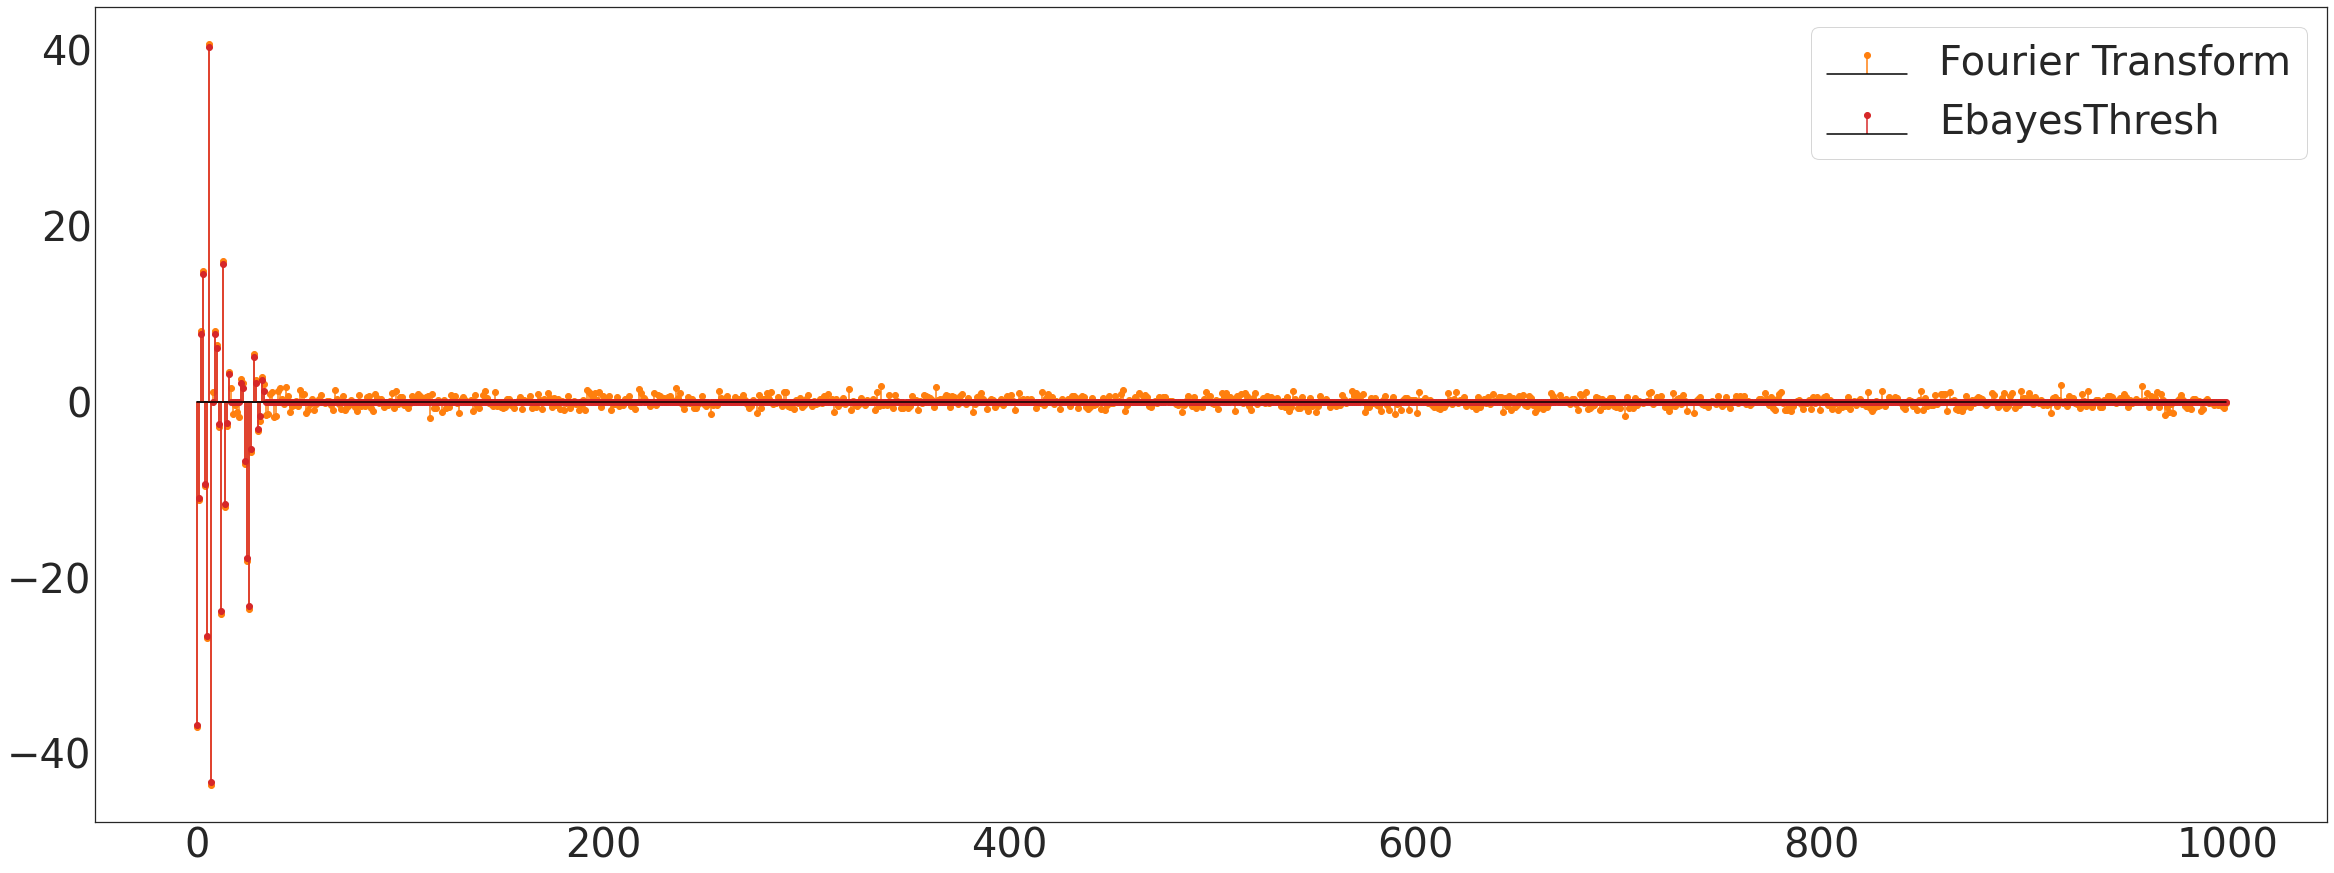

In [320]:
with plt.style.context('seaborn-white'):
    fig, ax1 = plt.subplots(figsize=(40,15))
    ax1.stem(itstgcn.make_Psi(_T).T@np.array(_x),linefmt='C1-',basefmt='k-',label='Fourier Transform')
    ax1.stem(ebayesthresh(FloatVector(itstgcn.make_Psi(_T).T@np.array(_x))),linefmt='C3-',basefmt='k-',label='EbayesThresh')
    ax1.legend(fontsize=40,loc='upper right',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=40)
    ax1.tick_params(axis='x', labelsize=40)